# Pokemon Image Color Analysis

## Team Members

- Joseph Lunine: jel99@drexel.edu
- Owen Marett: om337@drexel.edu
- Evan Radcliffe: emr76@drexel.edu
- Jiangyan Shi: js4986@drexel.edu



## Part 1 - Basic Analysis of Data from PokeAPI
### Section 1.1 - Pre-process Data from PokeAPI
Collect type and color data for each pokemon from PokeAPI data to generate DataFrame object and save into csv file. At the end, display the shape of DataFrame object and first 5 records.

In [1]:
import json, os
import pandas as pd


globalFolderData = "./data/"


'''
createFolder() create a folder by full path if not existing.
 - foldername: full path to create a folder.
'''
def createFolder(foldername):
    if not os.path.exists(foldername):
        os.mkdir(foldername)
    return


pokemonJson = json.load(open('../pokeAPI/data/detailed_pokemon_species.json'))
pokemonList = []
for key, pokemon in pokemonJson.items():
    pokemonList.append([key, pokemon['name'], pokemon['color'], pokemon['shape'], pokemon['types'][0], pokemon['types'][1] if len (pokemon['types']) > 1 else ''])

columns = ['id', 'name', 'color', 'shape', 'type1', 'type2']
pokemonDf = pd.DataFrame(pokemonList, columns = columns)
createFolder(globalFolderData)
pokemonDf.to_csv(globalFolderData + 'pokemons.csv', index = False)
print('Total number of Pokemons:', len(pokemonDf))
print(pokemonDf[:5])

Total number of Pokemons: 898
    id        name  color      shape  type1   type2
0  001   bulbasaur  green  quadruped  grass  poison
1  002     ivysaur  green  quadruped  grass  poison
2  003    venusaur  green  quadruped  grass  poison
3  004  charmander    red    upright   fire        
4  005  charmeleon    red    upright   fire        


### Section 1.2 - Display Bar Chart by Color
Count pokemons by color, then display both counter details and bar chart by color.

These 898 Pokemons use 10 colors:
OrderedDict([('black', 44), ('blue', 157), ('brown', 131), ('gray', 85), ('green', 108), ('pink', 52), ('purple', 85), ('red', 86), ('white', 75), ('yellow', 75)])


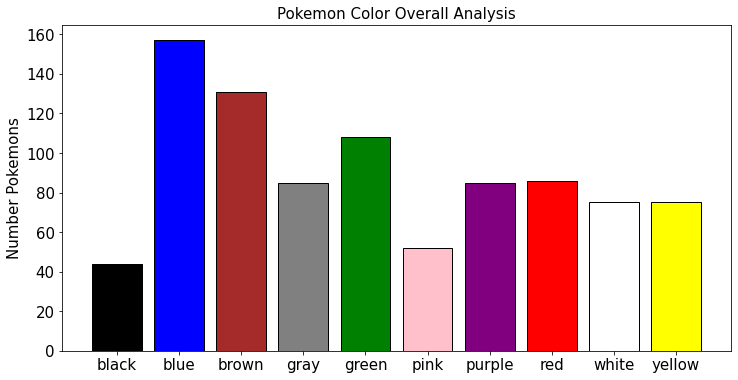

In [2]:
from collections import Counter
from collections import OrderedDict
from matplotlib import pyplot as plt

countsColor = OrderedDict(sorted(Counter(pokemonDf['color']).items()))
print(f'These {sum(countsColor.values())} Pokemons use {len(countsColor.keys())} colors:')
print(countsColor)
colors = [label for label in countsColor.keys()]

bar_fig = plt.figure(figsize = (12, 6))  
plt.bar(x = range(1, len(countsColor) + 1), height = list(countsColor.values()), tick_label = colors, color = colors, edgecolor = 'black')

plt.tick_params(labelsize = 15)
plt.title("Pokemon Color Overall Analysis", fontsize = 15)
plt.ylabel("Number Pokemons", fontsize = 15)

plt.show()

### Section 1.3 - Display Bar Chart by Primary Type
Count pokemons by primary type, then display both counter details and bar chart by type.

These 898 Pokemons have 18 primary types:
OrderedDict([('bug', 75), ('dark', 36), ('dragon', 31), ('electric', 49), ('fairy', 21), ('fighting', 36), ('fire', 58), ('flying', 7), ('ghost', 31), ('grass', 86), ('ground', 35), ('ice', 28), ('normal', 109), ('poison', 35), ('psychic', 58), ('rock', 50), ('steel', 30), ('water', 123)])


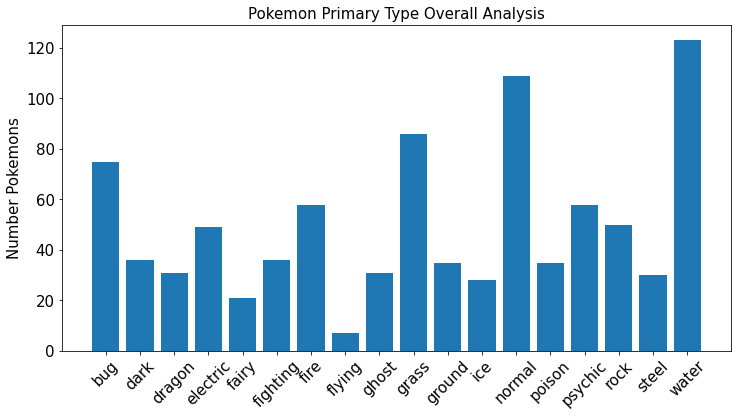

In [3]:
countsType = OrderedDict(sorted(Counter(pokemonDf['type1']).items()))
print(f'These {sum(countsType.values())} Pokemons have {len(countsType.keys())} primary types:')
print(countsType)
types = [label for label in countsType.keys()]

bar_fig = plt.figure(figsize = (12, 6))  
plt.bar(x = range(1, len(countsType) + 1), height = list(countsType.values()), tick_label = types)

plt.tick_params(labelsize = 15)
plt.title("Pokemon Primary Type Overall Analysis", fontsize = 15)
plt.ylabel("Number Pokemons", fontsize = 15)
plt.xticks(rotation = 45)

plt.show()

### Section 1.4 - Display Bar Chart by Color and Primary Type
Count pokemons by primary type and color, then display both counter details and bar chart by primary type and color. Here is  summary:
- 8 types have 1 dominate color:
 - most electric use yellow
 - most fire use red
 - most grass use green
 - most ground use brown
 - most normal use brown
 - most poison use purple
 - most steel use gray
 - most water use blue
- 10 types have 2 clost top colors:
 - bug uses 18 red and 15 yellow
 - dark uses 9 black and 5 blue/gray
 - dragon uses 9 blue and 8 green
 - fairy uses 10 white and 7 pink
 - fighting uses 8 brown and 8 gray
 - flying uses 3 blue and 3 purple
 - ghost uses 10 black and 9 purple
 - ice uses 10 blue and 9 white
 - psychic uses 10 blue and 10 pink
 - rock uses 14 brown and 12 gray

          black  blue  brown  gray  green  pink  purple  red  white  yellow
bug           2     6      3     9     10     0       6   18      6      15
dark          9     5      4     5      1     2       4    4      1       1
dragon        1     9      1     4      8     0       3    2      2       1
electric      3     7      0     4      2     1       3    3      4      22
fairy         0     2      0     0      1     7       1    0     10       0
fighting      0     5      8     8      1     0       3    3      5       3
fire          0     0     12     1      0     0       0   34      3       8
flying        0     3      0     0      1     0       3    0      0       0
ghost        10     0      6     1      1     0       9    0      2       2
grass         0     5      9     2     49     5       6    2      5       3
ground        1     1     14     7      6     0       2    2      0       2
ice           0    10      3     2      0     1       1    2      9       0
normal      

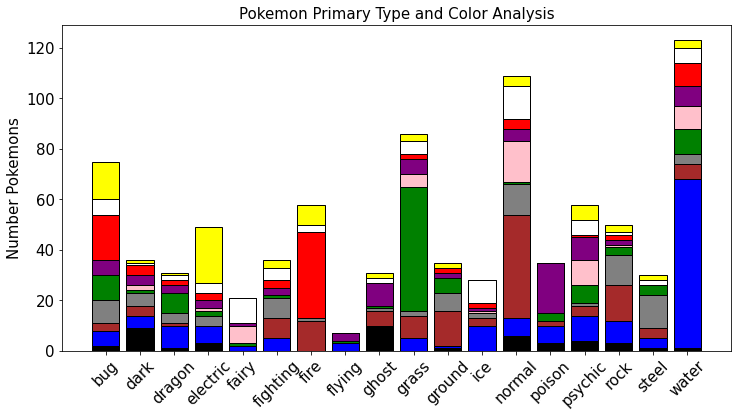

In [4]:
import numpy as np

datas = [[0] * len(colors)] * len(types)
counters = pd.DataFrame(datas, index = types, columns = colors)
for i, pokemon in pokemonDf.iterrows():
    counters[pokemon['color']][pokemon['type1']] += 1
print(counters)

bar_fig = plt.figure(figsize = (12, 6))
y_offset = np.zeros(len(counters.index))
for color in colors:
    plt.bar(counters.index, counters[color], bottom = y_offset, color = color, edgecolor = 'black')
    y_offset = y_offset + counters[color]

plt.tick_params(labelsize = 15)
plt.title("Pokemon Primary Type and Color Analysis", fontsize = 15)
plt.ylabel("Number Pokemons", fontsize = 15)
plt.xticks(rotation = 45)

plt.show()

### Section 1.5 - Display Bar Chart by Primary and Secondary Types
Count pokemons by type for primary and secondary both types, then display both counter details and bar chart by both types.

The same 18 types have 1340 Pokemons if counting both primary and secondary types:
OrderedDict([('bug', 84), ('dark', 55), ('dragon', 56), ('electric', 57), ('fairy', 54), ('fighting', 61), ('fire', 71), ('flying', 102), ('ghost', 51), ('grass', 107), ('ground', 67), ('ice', 41), ('normal', 115), ('poison', 69), ('psychic', 90), ('rock', 65), ('steel', 54), ('water', 141)])


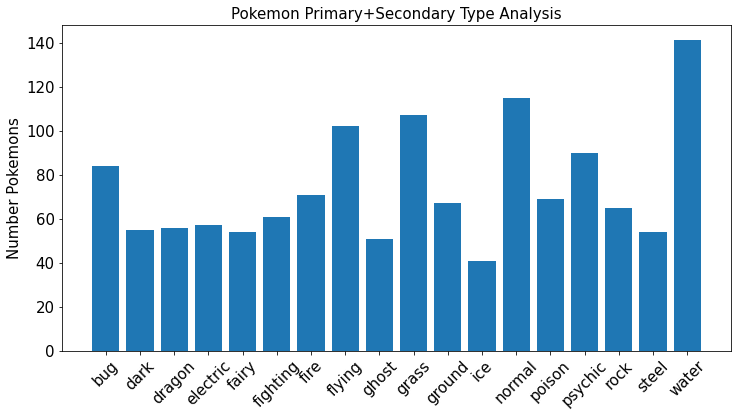

In [5]:
countsType2 = OrderedDict(sorted(Counter(pokemonDf['type1']).items()))
for type in pokemonDf['type2']:
    if type != '':
        countsType2[type] += 1
types = [label for label in countsType2.keys()]
print(f'The same {len(countsType2.keys())} types have {sum(countsType2.values())} Pokemons if counting both primary and secondary types:')
print(countsType2)

bar_fig = plt.figure(figsize = (12, 6))  
plt.bar(x = range(1, len(countsType2) + 1), height = list(countsType2.values()), tick_label = types)

plt.tick_params(labelsize = 15)
plt.title("Pokemon Primary+Secondary Type Analysis", fontsize = 15)
plt.ylabel("Number Pokemons", fontsize = 15)
plt.xticks(rotation = 45)

plt.show()

## Section 1.6 - Display Bar Chart by Color and Primary and Secondary Type
Count pokemons by primary and secondary type and color, then display both counter details and bar chart by both types and color. Here is summary similar to with only primary type:
- 8 types have same same dominate color (electric, fire, grass, ground, normal, poision, steel, and water):
- 10 types have 2 clost top colors:
 - bug uses 20 red and 15 yellow
 - dark uses 9 black and 8 brown/purple/red
 - dragon uses 13 blue and 15 green
 - fairy uses 13 white and 17 pink
 - fighting uses 10 blue/brown and 11 gray
 - flying uses 17 blue and 20 brown
 - ghost uses 10 black and 12 purple
 - ice uses 15 blue and 13 white
 - psychic uses 17 blue and 16 pink
 - rock uses 14 brown and 19 gray

          black  blue  brown  gray  green  pink  purple  red  white  yellow
bug           2     6      3    11     12     0       7   20      8      15
dark          9     7      8     6      3     2       8    8      2       2
dragon        3    13      3     4     15     0       8    4      5       1
electric      4    10      1     4      3     1       3    3      4      24
fairy         1     6      0     3      3    17       5    1     13       5
fighting      0    10     10    11      4     2       3    9      7       5
fire          8     0     12     1      0     0       0   34      7       9
flying        7    17     20     4     10     1      12   12      9      10
ghost        10     0     11     3      6     0      12    1      6       2
grass         0     5     14     2     59     6       7    4      5       5
ground        1    12     23    12      9     0       4    3      0       3
ice           2    15      3     3      0     1       2    2     13       0
normal      

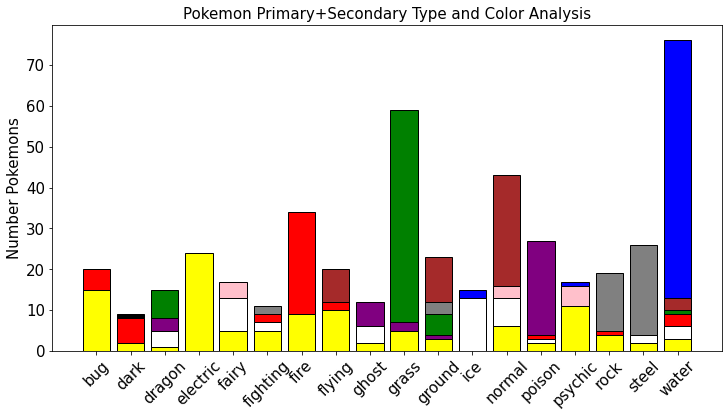

In [6]:
counters2 = pd.DataFrame([[0] * len(colors)] * len(types), index = types, columns = colors)
for i, pokemon in pokemonDf.iterrows():
    counters2[pokemon['color']][pokemon['type1']] += 1
    if pokemon['type2'] != '':
        counters2[pokemon['color']][pokemon['type2']] += 1
print(counters2)

bar_fig = plt.figure(figsize = (12, 6)) 
y_offset = np.zeros(len(counters2.index)) 
for color in colors:
    plt.bar(counters2.index, counters2[color], color = color, edgecolor = 'black')
    y_offset = y_offset + counters2[color]

plt.tick_params(labelsize = 15)
plt.title("Pokemon Primary+Secondary Type and Color Analysis", fontsize = 15)
plt.ylabel("Number Pokemons", fontsize = 15)
plt.xticks(rotation = 45)

plt.show()

### Section 1.7 - Comparison between Most Color per Type between Primary and Primary+Secondary
The percentage of highest number of pokemons for each type in only primary type should be higher than in both primary and secondary, since more other color are added from other types. Here is summary:
- for 8 types having dominate color (electric, fire, grass, ground, normal, poision, steel, and water):
 - all have higher percentage of dominate color in primary type, except steel
 - fire and poision have dominate color in primary more than 10% in primar+secondary
- for 10 types having 2 top colors:
 - 6 types have different higher percentage colors
   - dragon: blue in primary vs green in primary+secondary
   - fairy: white in primary vs pink in primary+secondary
   - fighting: brown in primary vs gray in primary+secondary
   - flying: blue in primary vs brown in primary+secondary
   - ghost: black in primary vs purple in primary+secondary
   - rock: brown in primary vs gray in primary+secondary
 - ice and psychic have higher percentage in primary+secondary
 - bug and dark have higher percentage in primary type

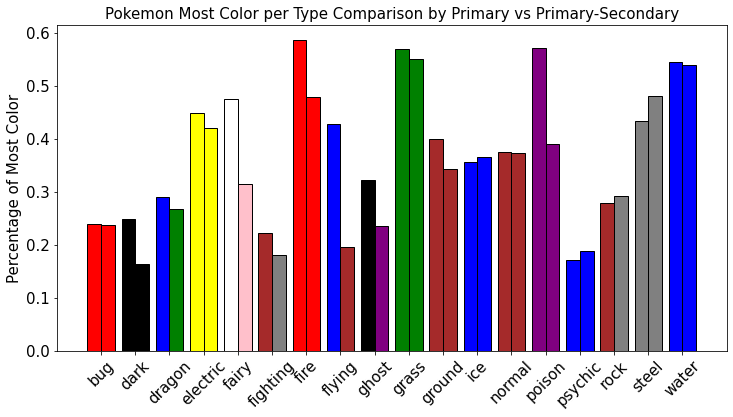

In [7]:
import numpy as np

def getSummary(counters):
    summary = []
    for index in counters.index:
        maxType = 0
        colorType = ''
        total = 0
        for color in counters.columns:
            #print(counters[color][index])
            total += counters[color][index]
            if counters[color][index] > maxType:
                maxType = counters[color][index]
                colorType = color
        summary.append([total, maxType, colorType])
    summaryPD = pd.DataFrame(summary, index = counters.index, columns = ['total', 'max', 'color'])
    summaryPD['percentage'] = summaryPD['max'] / summaryPD['total']
    return summaryPD

summary = getSummary(counters)
summary2 = getSummary(counters2)
x_axis = np.arange(len(summary.index))
bar_fig = plt.figure(figsize = (12, 6))  
plt.bar(x = x_axis - 0.2, height = summary['percentage'], color = summary['color'], label = 'Primary', width = 0.4, edgecolor = 'black')
plt.bar(x = x_axis + 0.2, height = summary2['percentage'], color = summary2['color'], label = 'Primary+Secondary', width = 0.4, edgecolor = 'black')

plt.xticks(x_axis, summary.index)
plt.tick_params(labelsize = 15)
plt.title("Pokemon Most Color per Type Comparison by Primary vs Primary-Secondary", fontsize = 15)
plt.ylabel("Percentage of Most Color", fontsize = 15)
plt.xticks(rotation = 45)

plt.show()